# Data Analysis of Aviation Accident Database & Synopses, up to 2023

## Introduction

In this project we will analyse data that includes: aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters, from the National Transportation Safety Board.

## Objectives

- Understand the datadet.
- Clean and preprocess the data.
- Analyse the severity of the accident.
- Identify the most common causes of accidents.
- Assess accident trends over time.
- Examine accident distribution by aircraft type, operator, and region.

## Business Understanding 

###  Which aircraft models present the lowest safety risks, based on historical aviation accident data?

This analysis will guide decisions regarding the purchasing of aircrafts  for the company’s new aviation division, helping make logical investments, minimize operational and liability risks from the beginning. Through identifying low-risk aircraft models based on real accident history.

## Data Understanding

The data sources for this analysis will be pulled from :

**AviationData.csv**

- Source: This data comes from the National Transportation Safety Board.
- Content: The NTSB aviation accident database contains information from 1962 to 2023 about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.
- Format: This is a csv file, each row represents one aviation accident and each columns contains different types of information regarding the flight.

## Requirements

1. A list of aircraft with the lowest accident/fatality rates.
2. Visualizations of safety trends and summaries.
3. Business-ready recommendations for safe investment.


The aviation accident dataset provides insightful, multi-dimensional data that will support identifying low-risk aircraft models for use specifically for the company. Understanding the structure, completeness, and key attributes of this data is essential to producing reliable and actionable safety insights for strategic aircraft procurement.


### Acquaring the Data

Install seaborn and import the necessary libraries

In [230]:
#install seaborn
!pip install seaborn

In [231]:
# import pandas, matplotlib, seaborn and numpy and the necessary aliases

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Import the AviationData file

In [232]:
#use pandas to load the file into a pandas dataframe
#display the first five rows of the dataframe
import pandas as pd

df = pd.read_csv(
    r"C:\Users\Halla\Downloads\archive (2)\AviationData.csv",
    encoding='latin1', low_memory = False
)
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [233]:
#confirm that it is a dataframe
type(df)

pandas.core.frame.DataFrame

## Understanding the Structure of the Dataframe

In [234]:
#gives a detailed summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [235]:
# Summary statistics of numeric columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [236]:
#number of rows and columns
df.shape

(88889, 31)

In [237]:
#lists all column names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Data Cleaning

In [238]:
#drop columns that have too many missing values and are irrelevant to this analysis
df = df.drop(columns=[
    'Event.Id',
    'Accident.Number',
    'Registration.Number',
    'Airport.Code',
    'Airport.Name',
    'Air.carrier',
    'Report.Status',
    'Publication.Date'
], errors='ignore')

df.head()

,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,NaN,Stinson,...,Reciprocating,NaN,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,NaN,Piper,...,Reciprocating,NaN,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,NaN,Cessna,...,Reciprocating,NaN,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,NaN,Rockwell,...,Reciprocating,NaN,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,NaN,Cessna,...,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [239]:
# number of columns  has reduced from 31 to 23
df.shape

(88889, 23)

In [240]:
#check for duplicates
df.duplicated().sum()

np.int64(31)

In [241]:
#arrange in descending order name of column and their number of missing values
df.isnull().sum().sort_values(ascending=True)

Investigation.Type            0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Amateur.Built               102
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Weather.Condition          4492
Total.Uninjured            5912
Number.of.Engines          6084
Purpose.of.flight          6192
Engine.Type                7096
Total.Fatal.Injuries      11401
Total.Minor.Injuries      11933
Total.Serious.Injuries    12510
Broad.phase.of.flight     27165
Latitude                  54507
Longitude                 54516
Aircraft.Category         56602
FAR.Description           56866
Schedule                  76307
dtype: int64

In [242]:
#filter out missing and unkown values in engine type
df[df['Engine.Type'].notna() & (df['Engine.Type'] != 'unknown')]

,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,NaN,Stinson,...,Reciprocating,NaN,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,NaN,Piper,...,Reciprocating,NaN,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,NaN,Cessna,...,Reciprocating,NaN,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,NaN,Rockwell,...,Reciprocating,NaN,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
5,Accident,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,...,Turbo Fan,Part 129: Foreign,SCHD,NaN,NaN,NaN,1.0,44.0,VMC,Climb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,Accident,2022-10-06,"Iola, TX",United States,304354N,0096752W,Non-Fatal,Substantial,Airplane,CESSNA,...,Reciprocating,091,NSCH,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88647,Accident,2022-10-08,"Dacula, GA",United States,034055N,0835224W,Non-Fatal,Substantial,Airplane,CESSNA,...,Reciprocating,091,NaN,Personal,0.0,0.0,0.0,2.0,VMC,NaN
88661,Accident,2022-10-13,"Ardmore, OK",United States,034849N,0097722W,Non-Fatal,Substantial,Airplane,BEECH,...,Reciprocating,091,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88735,Accident,2022-10-29,"Houston, TX",United States,293620N,0095959W,Minor,Substantial,Airplane,STEPHEN J HOFFMAN,...,Reciprocating,091,NaN,ASHO,0.0,1.0,0.0,0.0,VMC,NaN


In [243]:
#fill missing data in columns(make/model) with 'Unknown'
df['Make'] = df['Make'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')

#check for missing values in make column
df['Make'].isnull().sum()

#check for missing values in model column
df['Model'].isnull().sum()

np.int64(0)

In [244]:
#combine make and model column using string concatenation to make the column aircraft_name
df['Aircraft.Name'] = df['Make'].astype(str) + ' ' + df['Model'].astype(str)
df['Aircraft.Name']

0                           Stinson 108-3
1                          Piper PA24-180
2                             Cessna 172M
3                            Rockwell 112
4                              Cessna 501
                       ...               
88884                     PIPER PA-28-151
88885                       BELLANCA 7ECA
88886    AMERICAN CHAMPION AIRCRAFT 8GCBC
88887                         CESSNA 210N
88888                     PIPER PA-24-260
Name: Aircraft.Name, Length: 88889, dtype: object

In [245]:
#number of columns and their labels
print(len(df.columns))
df.columns

24


Index(['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'FAR.Description', 'Schedule', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Aircraft.Name'],
      dtype='object')

In [246]:
#change the datatype values in the event_date and numerical columns
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
num_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df.head()

,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,FAR.Description,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Aircraft.Name
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,NaN,Stinson,...,NaN,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Stinson 108-3
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,NaN,Piper,...,NaN,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Piper PA24-180
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,NaN,Cessna,...,NaN,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Cessna 172M
3,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,NaN,Rockwell,...,NaN,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Rockwell 112
4,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,NaN,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Cessna 501


In [247]:
#adds column Total.Aboard for total people onboard
df['Total.Aboard'] = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured']].sum(axis=1)
df['Total.Aboard']

0        2.0
1        4.0
2        3.0
3        2.0
4        3.0
        ... 
88884    1.0
88885    0.0
88886    1.0
88887    0.0
88888    2.0
Name: Total.Aboard, Length: 88889, dtype: float64

In [248]:
#column for accident outcomes
df['Fatal'] = df['Total.Fatal.Injuries'] > 0
df['Fatal']

0         True
1         True
2         True
3         True
4         True
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Name: Fatal, Length: 88889, dtype: bool

In [249]:
#shows 10 aircraft types with the lowest average fatality rate per incident
df.groupby('Aircraft.Name')['Fatal'].mean().sort_values().head(10)

Aircraft.Name
AB SPORTINE AVIACIJA GENESIS 2    0.0
Zielke RV-4                       0.0
Zenith ZODIAC CH-650              0.0
Zenith ZODIAC CH 650              0.0
Zenith CH650LS                    0.0
Zenith CH601                      0.0
Zenith 601HDS                     0.0
Zengel RV-4                       0.0
Zenair Zodiac CH601               0.0
Zenair Zodiac 601HDS              0.0
Name: Fatal, dtype: float64

 ## Exploratory Data Analysis: Data Visualizations

 ### Bar Plot

 In my analysis, I will be comparing categorical and numerical data such as: The number of accidents comared to the aircraft name and the engine type. Bar plots are best for comparing such data types and will be most efficient for the business.
  

1. Create a bar plot showing the top 5 Aircraft models in accidents by frequency

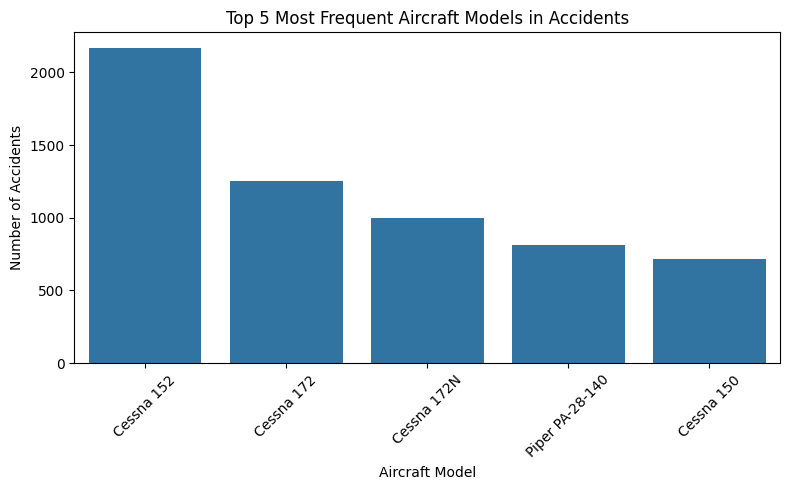

In [250]:
#Count top 5 most common aircraft models in accidents
Top_Models = df['Aircraft.Name'].value_counts().head(5)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

#Create the bar plot on the axis
sns.barplot(x=Top_Models.index, y=Top_Models.values, ax=ax)

# Customize the plot
ax.set_title("Top 5 Most Frequent Aircraft Models in Accidents")
ax.set_xlabel("Aircraft Model")
ax.set_ylabel("Number of Accidents")

# Adjust layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Create a bar plot showing the top 10 least likely aircrafts to be involved in accidents

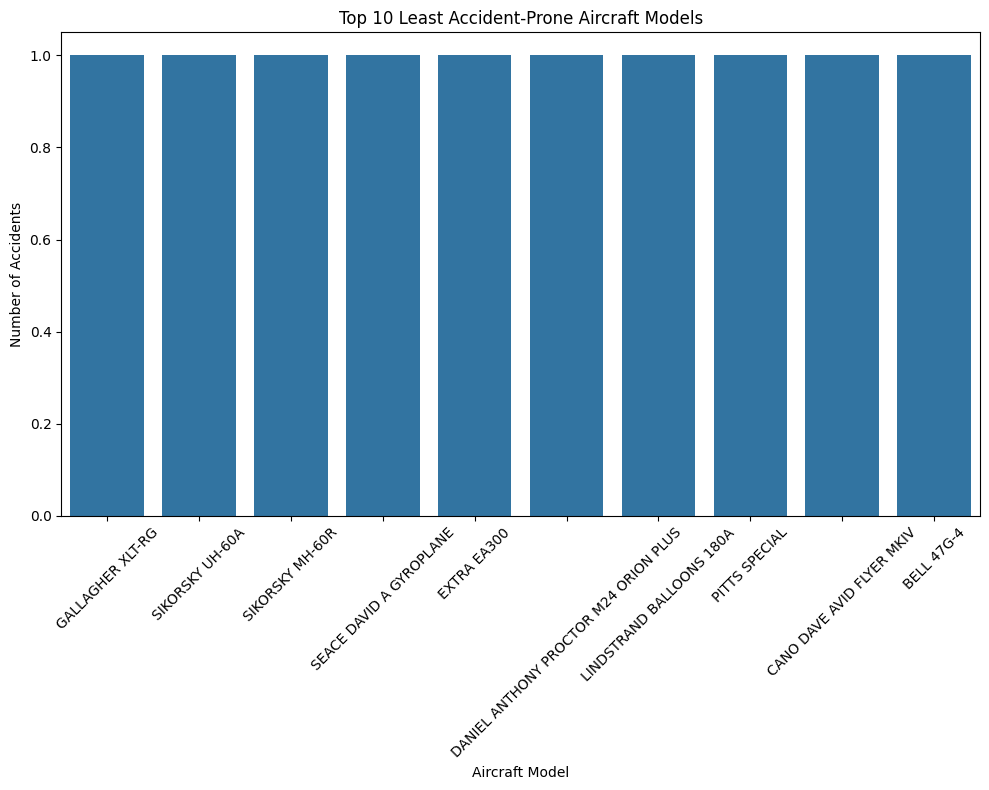

In [251]:
# Get 10 least frequent aircraft models (excluding unknowns if necessary)
least_common = df['Aircraft.Name'].value_counts(ascending=True).head(10)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot vertical bars (aircraft on x-axis, counts on y-axis)
sns.barplot(x=least_common.index, y=least_common.values, ax=ax)

# Add title and axis labels
ax.set_title("Top 10 Least Accident-Prone Aircraft Models")
ax.set_xlabel("Aircraft Model")
ax.set_ylabel("Number of Accidents")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Create a bar plot comparing the engine type and the number of accidents

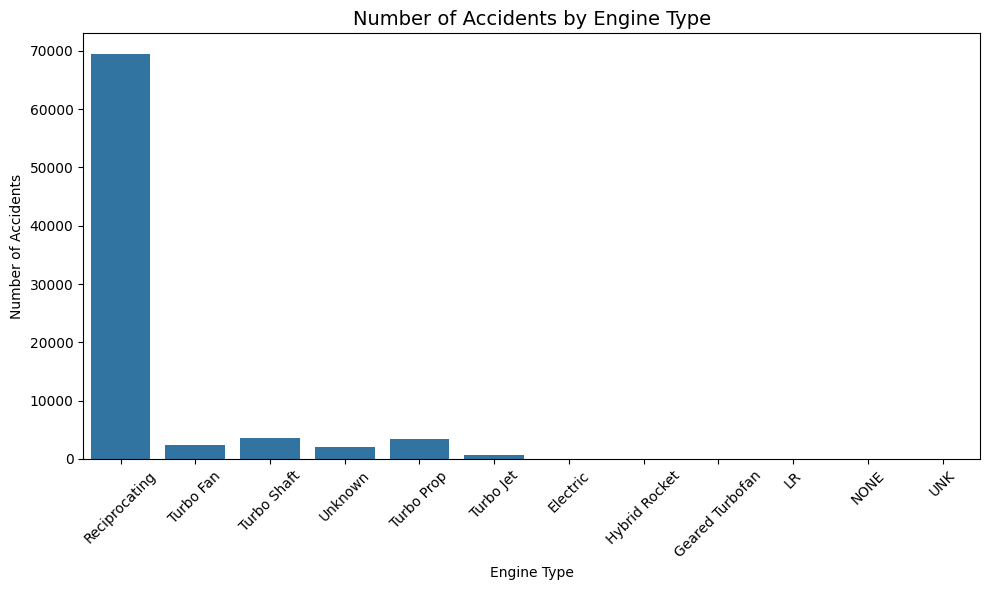

In [252]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
sns.countplot(x='Engine.Type', data=df, ax=ax)

# Customize plot
ax.set_title("Number of Accidents by Engine Type", fontsize=14)
ax.set_xlabel("Engine Type")
ax.set_ylabel("Number of Accidents")

# Rotate labels if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Conclusion

From the visualizations and codes we can answer business questions such as:

1. Which aircraft models have lowest fatality rates?
- AB SPORTINE AVIACIJA GENESIS 2    
- Zielke RV-4                       
- Zenith ZODIAC CH-650              
- Zenith ZODIAC CH 650              
- Zenith CH650LS                    
- Zenith CH601                      
- Zenith 601HDS                     
- Zengel RV-4                       
- Zenair Zodiac CH601               
- Zenair Zodiac 601HDS   

2. Which aircraft are most frequently involved in accidents?
- Cessna 152
- Cessna 172
- Cessna 172N
- Cessna 150
- Piper PA-28-140
  
3. Which engines are most suitable to be used in aircrafts to reduce the risk of accidents?
- UNK
- Geared Turbofan
- LR
- Hybrid Rocket
- Electric

4. What are the top 5 least accident prone aircraft models?
- PITTS Special
- Extra EA300
- BELL 47G-4
- Sikorsky MH-60R
- Sikorsky UH-60A

### Summary

In [253]:
"""
Based on the analysis conducted to support the company's entry into the aviation sector,
I would suggest the Sikorsky models(MH-60R,UH-60A), AB SPORTINE AVIACIJA GENESIS 2 
and the Zenith aircraft for initial purchase.
These models have shown relatively low involvement in accidents.

I strongly advise  against purchasing Cessna aircraft models.
While their high accident rate may partly reflect it's popularity,
the potential risk they present outweighs the benefits,
especially for a company making its first investment in aviation.

In terms of the engine, the UNK, Hybrid Rocket and the Electric would be the safest options.
However, if there are any budget constraints purchase of the electric engine should be avoided
and the former engines prioritized as the more cost-effective and reliable choices.

"""

"\nBased on the analysis conducted to support the company's entry into the aviation sector,\nI would suggest the Sikorsky models(MH-60R,UH-60A), AB SPORTINE AVIACIJA GENESIS 2 \nand the Zenith aircraft for initial purchase.\nThese models have shown relatively low involvement in accidents.\n\nI strongly advise  against purchasing Cessna aircraft models.\nWhile their high accident rate may partly reflect it's popularity,\nthe potential risk they present outweighs the benefits,\nespecially for a company making its first investment in aviation.\n\nIn terms of the engine, the UNK, Hybrid Rocket and the Electric would be the safest options.\nHowever, if there are any budget constraints purchase of the electric engine should be avoided\nand the former engines prioritized as the more cost-effective and reliable choices.\n\n"